In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [ ]:
target_counts = df['target'].value_counts().rename(index={0: 'malignant', 1: 'benign'})
print("Count of samples:\n", target_counts)

Count of samples:
 target
benign       357
malignant    212
Name: count, dtype: int64


In [ ]:
print("\nFeature names:\n", cancer.feature_names)


Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000         

In [ ]:
subset_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

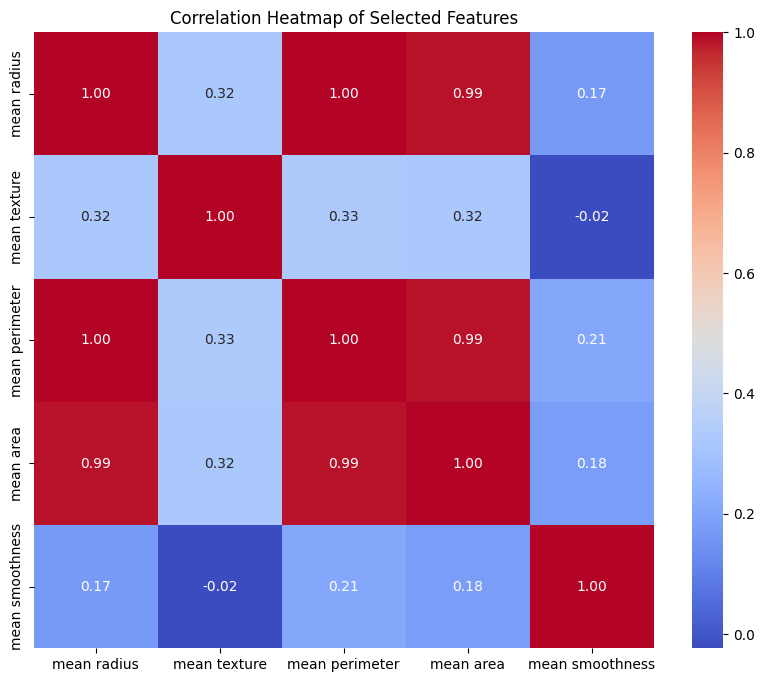

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[subset_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

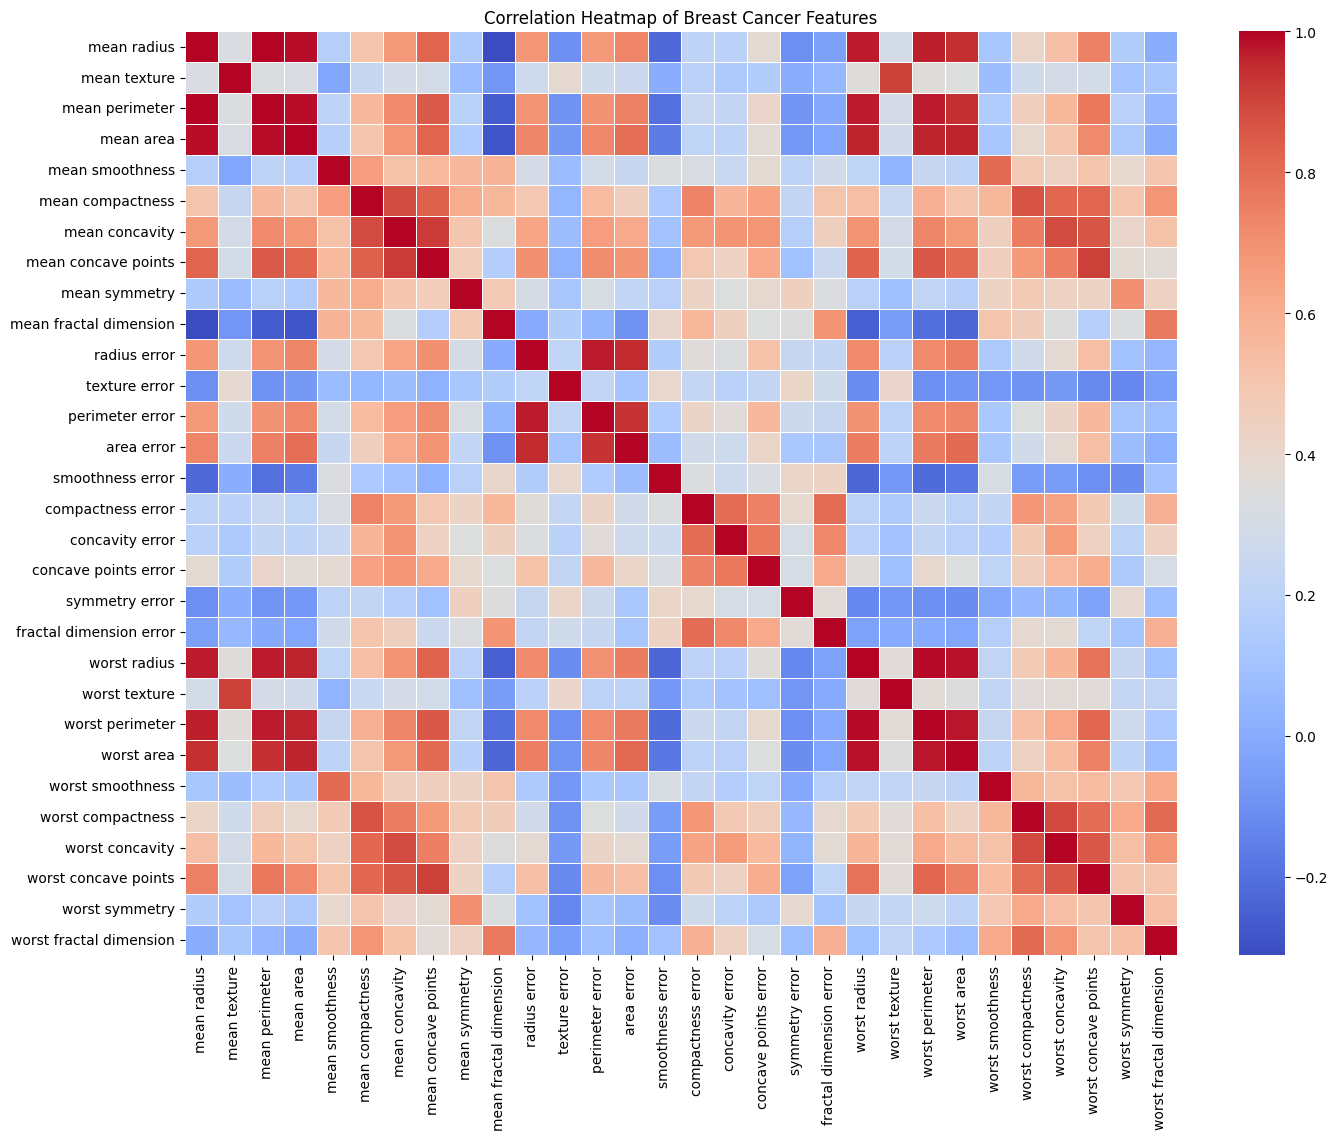

In [ ]:
plt.figure(figsize=(16, 12))
corr = df.drop(columns=['target']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

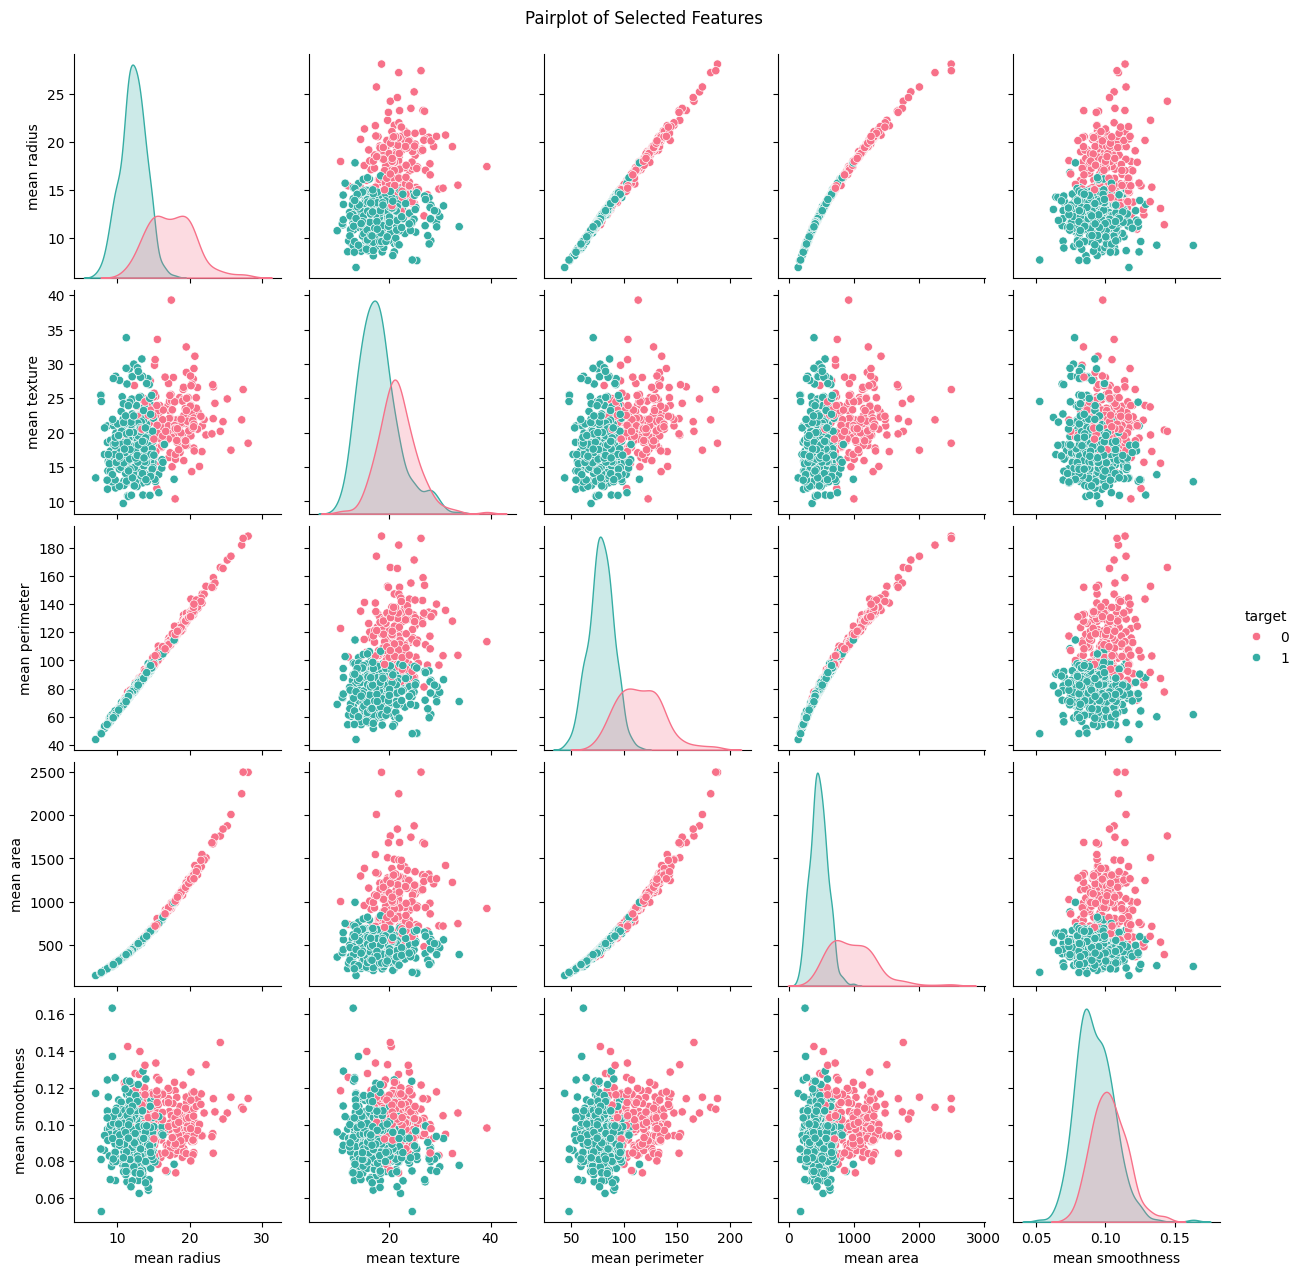

In [ ]:
sns.pairplot(df[subset_features + ['target']], hue='target', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

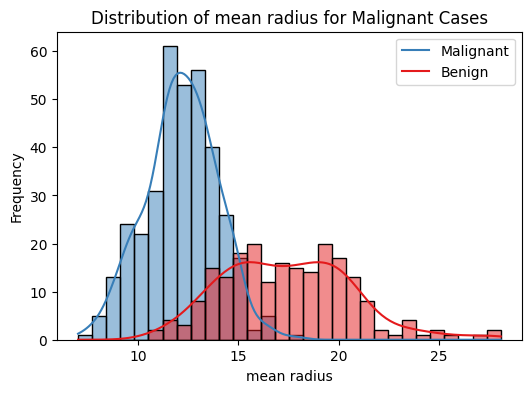

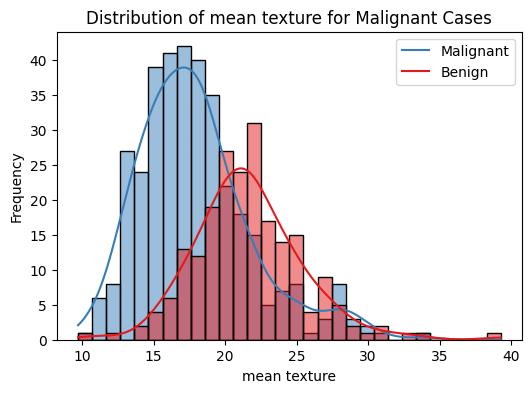

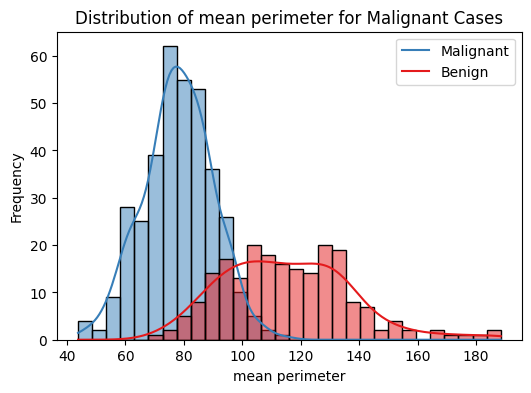

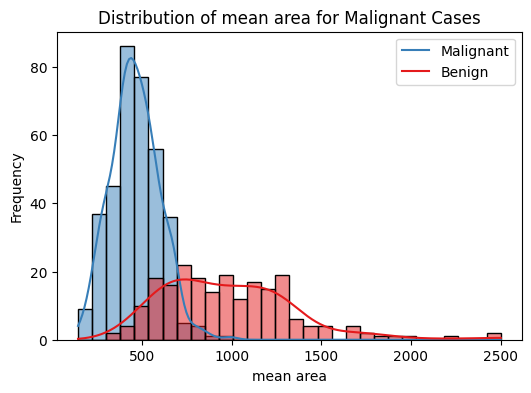

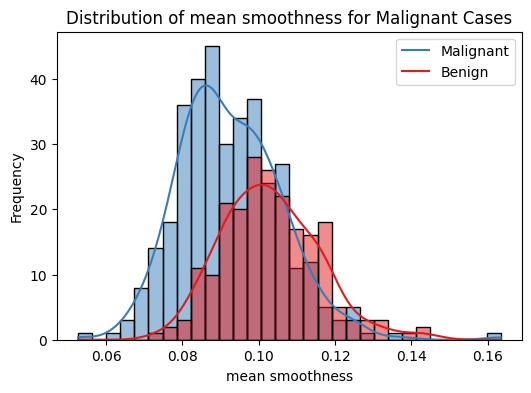

In [ ]:
for feature in subset_features:
  plt.figure(figsize=(6,4))
  sns.histplot(data=df,x=feature, kde=True,bins=30,palette='Set1', hue='target')
 # sns.histplot(df[df['target'] == 1][feature], label='Benign', kde=True,bins=20,palette='Set2', hue=df['target'])
  plt.title(f'Distribution of {feature} for Malignant Cases')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.legend(labels=['Malignant','Benign'])
  plt.show()

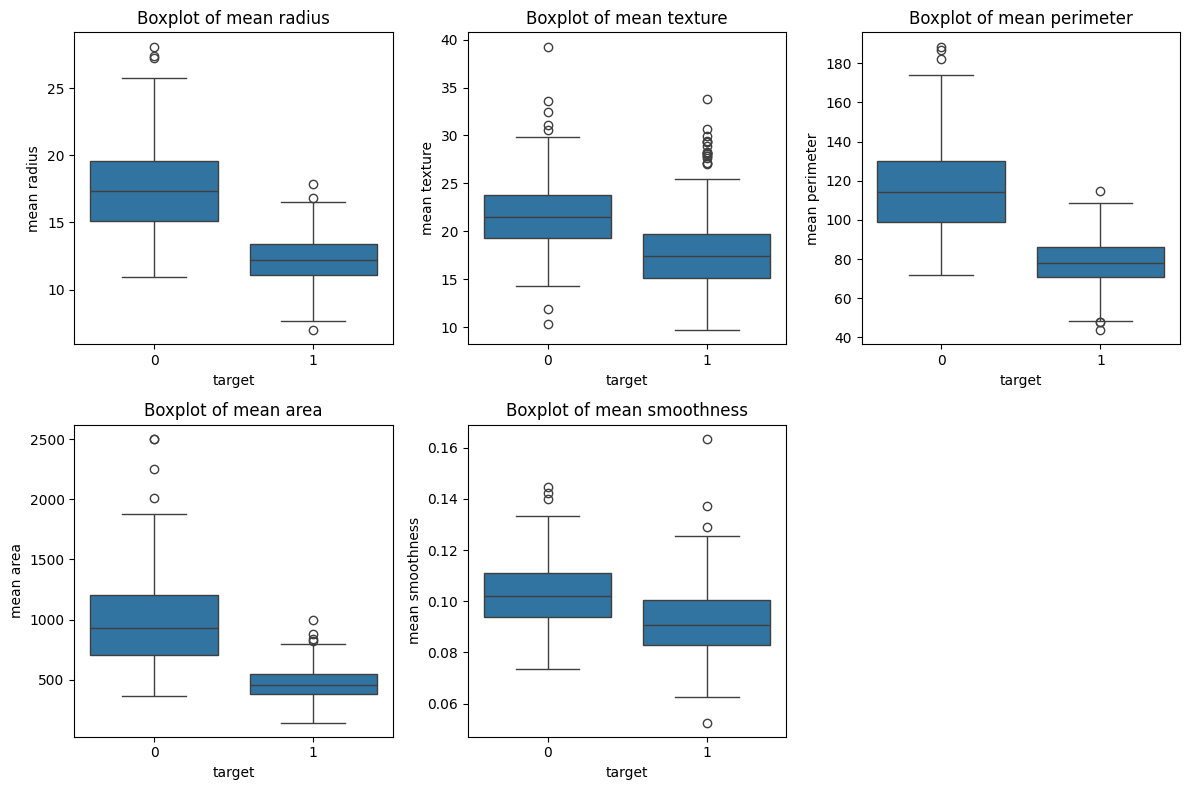

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(subset_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


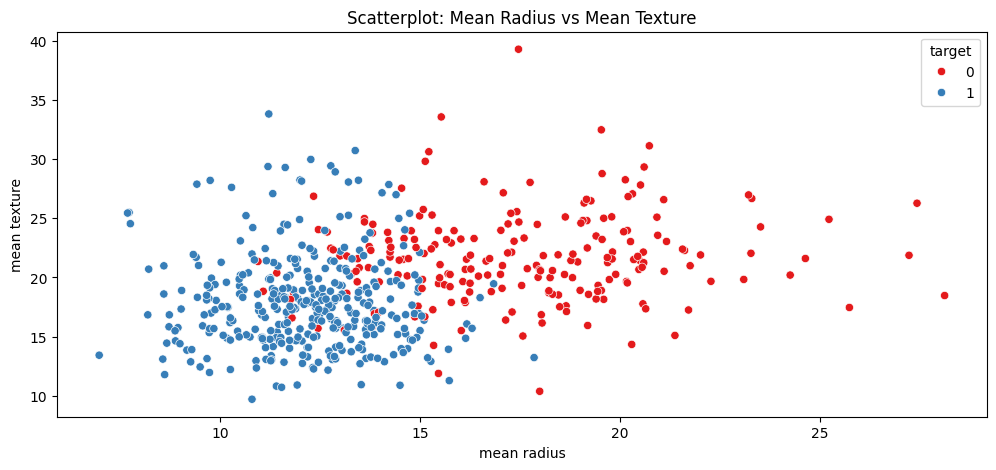

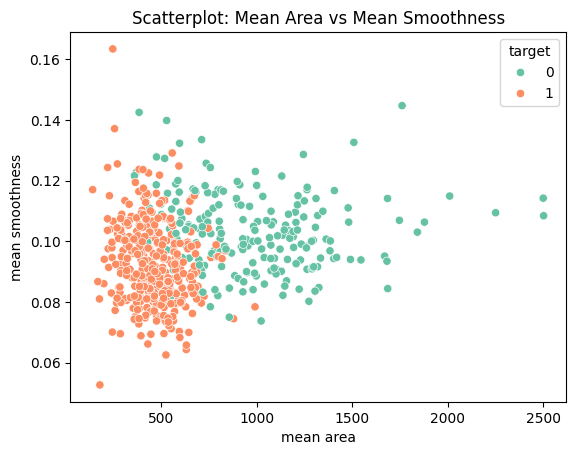

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target', palette='Set1')
plt.title('Scatterplot: Mean Radius vs Mean Texture')
plt.show()

sns.scatterplot(data=df, x='mean area', y='mean smoothness', hue='target', palette='Set2')
plt.title('Scatterplot: Mean Area vs Mean Smoothness')
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = cancer.data
y = cancer.target
y = y.reshape(-1, 1)

In [ ]:
X.shape
y.shape

(569, 1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def initialize_weights(n_features):
    w = np.zeros((n_features, 1))
    b = 0
    return w, b

In [ ]:
def propagate(w, b, X, y):
    m = X.shape[0]
    z = np.dot(X, w) + b
    a = sigmoid(z)

    cost = -(1/m) * np.sum(y * np.log(a + 1e-8) + (1 - y) * np.log(1 - a + 1e-8))  # Add small constant to avoid log(0)

    dw = (1/m) * np.dot(X.T, (a - y))
    db = (1/m) * np.sum(a - y)

    return dw, db, cost

In [ ]:
def train(X, y, num_iterations, learning_rate):
    n_features = X.shape[1]
    w, b = initialize_weights(n_features)
    costs = []

    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, y)
        #dw = dw.reshape(-1, 1)
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b

In [ ]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    a = sigmoid(z)
    return (a > 0.5).astype(int)

In [ ]:
w, b = train(X_train, y_train, num_iterations=2000, learning_rate=0.01)

Iteration 0: Cost 0.6931
Iteration 100: Cost 0.2522
Iteration 200: Cost 0.1897
Iteration 300: Cost 0.1615
Iteration 400: Cost 0.1448
Iteration 500: Cost 0.1336
Iteration 600: Cost 0.1253
Iteration 700: Cost 0.1190
Iteration 800: Cost 0.1139
Iteration 900: Cost 0.1097
Iteration 1000: Cost 0.1061
Iteration 1100: Cost 0.1031
Iteration 1200: Cost 0.1004
Iteration 1300: Cost 0.0981
Iteration 1400: Cost 0.0960
Iteration 1500: Cost 0.0942
Iteration 1600: Cost 0.0925
Iteration 1700: Cost 0.0910
Iteration 1800: Cost 0.0896
Iteration 1900: Cost 0.0883


In [ ]:
y_pred = predict(X_test, w, b)

In [ ]:
accuracy = np.mean(y_pred == y_test) * 100
print(f"\nTest Accuracy: {accuracy:.2f}%")


Test Accuracy: 99.12%
